In [60]:
import torch
import numpy as np
import pandas as pd
import pytorch_lightning as pl
from pathlib import Path
import glob
import utils
from utils.datasets import TestDataset
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

In [61]:
PROJECT_NAME = 'bm3d_vs_superonn'

In [62]:
df_all = pd.read_pickle('df_all_with_results.pkl')
idx_0_5_0 = np.where( df_all.max_shifts.isin(['[0,5,0]','[0,0,0]']) )
df_now = df_all.iloc[idx_0_5_0].loc[:,['ID','q','num_neurons','sigma','max_shifts','Kodak','McM','CBSD68']].sort_values(['q','num_neurons','sigma','max_shifts'])
df_now

,ID,q,num_neurons,sigma,max_shifts,Kodak,McM,CBSD68
39,2bzb1oq1,1,256,30,"[0,0,0]",28.420586,28.937571,27.285158
62,2598j4vg,1,256,30,"[0,5,0]",28.750648,29.416664,27.739851
36,1htbedh8,1,256,60,"[0,0,0]",25.130785,25.239988,24.172115
81,utzl5eit,1,256,60,"[0,5,0]",25.997068,26.321732,24.886024
40,15pgu9an,1,256,90,"[0,0,0]",23.145287,22.820133,22.242716
96,3iy28n0y,1,256,90,"[0,5,0]",24.465178,24.574797,23.431080
59,3hxln2bq,3,256,30,"[0,5,0]",28.847937,29.582045,27.901133
37,1t7lj8z1,3,256,60,"[0,0,0]",25.166443,25.152962,24.114594
86,32gv5yoz,3,256,60,"[0,5,0]",26.180649,26.127357,24.926729
44,10aksiux,3,256,90,"[0,0,0]",23.084036,22.128714,21.867142


In [63]:
# load checkpoints
ckpt_path = r"{project}//{id}//checkpoints//*.ckpt"

for index,row in df_now.iterrows():
    # format path for checkpoint
    ckpt_path_now = glob.glob( ckpt_path.format(project=PROJECT_NAME,id=row.ID) )[0]
    
    # load checkpoint
    model = utils.models.get_model('superonn')
    dn = utils.denoiser.Denoiser.load_from_checkpoint(ckpt_path_now,model=model,strict=False,map_location='cpu')
    
    df_now.loc[df_now['ID']==row['ID'],'Params'] = sum([p.numel() for p in dn.parameters()])

In [64]:
df_now

,ID,q,num_neurons,sigma,max_shifts,Kodak,McM,CBSD68,Params
39,2bzb1oq1,1,256,30,"[0,0,0]",28.420586,28.937571,27.285158,75073.0
62,2598j4vg,1,256,30,"[0,5,0]",28.750648,29.416664,27.739851,75073.0
36,1htbedh8,1,256,60,"[0,0,0]",25.130785,25.239988,24.172115,75073.0
81,utzl5eit,1,256,60,"[0,5,0]",25.997068,26.321732,24.886024,75073.0
40,15pgu9an,1,256,90,"[0,0,0]",23.145287,22.820133,22.242716,75073.0
96,3iy28n0y,1,256,90,"[0,5,0]",24.465178,24.574797,23.431080,75073.0
59,3hxln2bq,3,256,30,"[0,5,0]",28.847937,29.582045,27.901133,224833.0
37,1t7lj8z1,3,256,60,"[0,0,0]",25.166443,25.152962,24.114594,224833.0
86,32gv5yoz,3,256,60,"[0,5,0]",26.180649,26.127357,24.926729,224833.0
44,10aksiux,3,256,90,"[0,0,0]",23.084036,22.128714,21.867142,224833.0


In [65]:
df_now.to_excel('results_all.xlsx')

In [67]:
model = utils.get_model('superonn')
m = model(1,512,q=1)
sum([p.numel() for p in m.parameters()])

297601

In [17]:
df = pd.read_pickle('df_superonns_with_results.pkl')
idx_0_5_0 = np.where( df.max_shifts.isin(['[0,5,0]'])  )
df.iloc[idx_0_5_0].loc[:,['q','num_neurons','sigma','max_shifts','Kodak','McM','CBSD68']].sort_values(['q','num_neurons','sigma'])

,q,num_neurons,sigma,max_shifts,Kodak,McM,CBSD68
59,3,256,30,"[0,5,0]",28.847937,29.582045,27.901133
86,3,256,60,"[0,5,0]",26.180649,26.127357,24.926729
67,3,256,90,"[0,5,0]",24.513235,24.129328,23.380903
30,3,512,30,"[0,5,0]",29.164717,29.502970,27.809313
29,3,512,60,"[0,5,0]",26.244368,26.153570,24.937889
28,3,512,90,"[0,5,0]",24.656157,23.924660,23.267303
88,5,256,30,"[0,5,0]",29.062271,29.512150,27.761667
93,5,256,60,"[0,5,0]",26.215164,26.292070,24.935070
82,5,256,90,"[0,5,0]",24.529131,23.896841,23.148468
24,5,512,30,"[0,5,0]",29.154696,29.562540,27.807447


In [68]:
df.iloc[idx_0_10_0].groupby(['q','num_neurons','sigma']).transform(max)

,ID,clip,model_name,num_layers,train_ratio,dataset_name,num_channels,rounded_shifts,McM,Kodak,...,_timestamp,train_loss,top_val_psnr,epoch,CBSD68,trainer/global_step,global_step,Run Name,Version,max_shifts
22,1j81k2c0,True,NaN,4,0.95,dncnn,1,False,23.703316,24.589182,...,1.620067e+09,612.127808,23.659420,99.0,23.052404,NaN,353799.0,zbv77r,0,"[0,5,0]"
23,qugt5bqa,True,NaN,4,0.95,dncnn,1,False,26.142889,26.248667,...,1.619878e+09,419.805969,25.292364,99.0,24.874834,NaN,353799.0,75dh75,0,"[0,5,0]"
24,3jmppglr,True,NaN,4,0.95,dncnn,1,False,29.562540,29.154696,...,1.619860e+09,205.246017,28.364843,99.0,27.807447,NaN,353799.0,5e6g3d,0,"[0,5,0]"
25,3i33jjn3,True,NaN,4,0.95,dncnn,1,False,23.954542,24.635910,...,1.619821e+09,612.639221,23.649075,99.0,23.226717,NaN,353799.0,6o9zzm,0,"[0,5,0]"
26,34zjdv5m,True,NaN,4,0.95,dncnn,1,False,25.960239,26.270554,...,1.619821e+09,419.900787,25.284559,99.0,24.914097,NaN,353799.0,hl6n14,0,"[0,5,0]"
27,3vgie2sr,True,NaN,4,0.95,dncnn,1,False,29.564278,29.175758,...,1.619821e+09,205.048691,28.367121,99.0,27.825600,NaN,353799.0,pnkflx,0,"[0,5,0]"
28,3cor7x4g,True,NaN,4,0.95,dncnn,1,False,23.924660,24.656157,...,1.619688e+09,613.929504,23.631840,99.0,23.267303,NaN,353799.0,tiniiy,0,"[0,5,0]"
29,369n00ys,True,NaN,4,0.95,dncnn,1,False,26.153570,26.244368,...,1.619686e+09,421.410431,25.279003,99.0,24.937889,NaN,353799.0,rfc9dy,0,"[0,5,0]"
30,31t81r6a,True,NaN,4,0.95,dncnn,1,False,29.502970,29.164717,...,1.619681e+09,206.355377,28.340807,99.0,27.809313,NaN,353799.0,gtple6,0,"[0,5,0]"
59,3hxln2bq,True,NaN,4,0.95,dncnn,1,True,29.582045,28.847937,...,1.618886e+09,210.913574,28.207935,99.0,27.901133,NaN,353799.0,ocqnlq,0,"[0,5,0]"


In [30]:
df.groupby(['num_neurons','sigma','q','max_shifts'])['top_val_psnr'].max()

num_neurons  sigma  q  max_shifts
128          30     3  [0,10,10]     27.480684
                    5  [0,10,10]     27.681141
                    7  [0,10,10]     27.566143
             60     3  [0,10,10]     24.819099
                    5  [0,10,10]     24.814409
                                       ...    
512          90     5  [0,5,0]       23.649075
                       [1,5,1]       23.558073
                    7  [0,10,10]     23.735870
                       [0,5,0]       23.659420
                       [1,5,1]       23.664864
Name: top_val_psnr, Length: 117, dtype: float64

In [75]:
df_dncnn = pd.read_pickle('df_dncnn.pkl')
df_dncnn = df_dncnn.loc[:,['ID','q','num_neurons','sigma','max_shifts','Kodak','McM','CBSD68']].sort_values(['q','num_neurons','sigma','max_shifts'])

# load checkpoints
ckpt_path = r"{project}//{id}//checkpoints//*.ckpt"

for index,row in df_dncnn.iterrows():
    # format path for checkpoint
    ckpt_path_now = glob.glob( ckpt_path.format(project=PROJECT_NAME,id=row.ID) )[0]
    
    # load checkpoint
    model = utils.models.get_model('dncnn')
    dn = utils.denoiser.Denoiser.load_from_checkpoint(ckpt_path_now,model=model,strict=False,map_location='cpu')
    
    df_dncnn.loc[df_dncnn['ID']==row['ID'],'Params'] = sum([p.numel() for p in dn.parameters()])

df_dncnn.to_excel('results_dncnn.xlsx')

DnCNN initialized..
DnCNN initialized..
DnCNN initialized..


In [85]:
# test_path
test_path = Path("datasets/test")
test_datasets = ['Kodak','McM','CBSD68']

Kodak


(-0.5, 767.5, 511.5, -0.5)

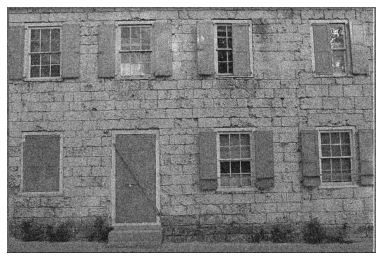

In [87]:
plt.imshow( image[0].squeeze().data.numpy(), cmap="gray")
plt.tight_layout()
plt.axis('off')

In [190]:
import cv2

def get_model_from_id(ID):
    ckpt_path = r"{project}//{id}//checkpoints//*.ckpt"
    ckpt_path_now = glob.glob( ckpt_path.format(project=PROJECT_NAME,id=ID) )[0]
    model = utils.models.get_model('superonn')
    dn = utils.denoiser.Denoiser.load_from_checkpoint(ckpt_path_now,model=model,strict=False,map_location='cpu')
    return dn.model

def put_rectangle(image,start_point,end_point,color,thickness=4):
    if isinstance(image,torch.Tensor): image = image.squeeze().cpu().data.numpy()
    return cv2.rectangle(image, start_point, end_point, color, thickness)

def plot_image_on_axis(image,ax):
    if isinstance(image,torch.Tensor): image = image.squeeze().cpu().data.numpy()
    ax.imshow(image,cmap="gray")
    ax.axis('off')

def get_cropped_image(image,start_point,end_point):
    return image[:,:,start_point[0]:end_point[0],start_point[1]:end_point[1]]

In [183]:
sigma = 90
num_neurons = 256


df_test = df_all.loc[
    (df_all.num_neurons==num_neurons) & 
    (df_all.sigma==sigma) & 
    (df_all.max_shifts.isin(['[0,0,0]','[0,5,0]']))
]

cnns = df_test.loc[(df_test.q == 1) & (df_test.max_shifts.isin(['[0,0,0]']))]
self_onns = df_test.loc[(df_test.q ==3) & (df_test.max_shifts.isin(['[0,0,0]'])) ]
super_onns = df_test.loc[(df_test.q ==3) & (df_test.max_shifts.isin(['[0,5,0]'])) ]

model_cnn = get_model_from_id(cnns.ID.values[0]).cuda()
model_selfonn = get_model_from_id(self_onns.ID.values[0]).cuda()
model_superonn = get_model_from_id(super_onns.ID.values[0]).cuda()

len(cnns),len(self_onns),len(super_onns)

(1, 1, 1)

In [184]:
import matplotlib.pyplot as plt

Kodak


In [195]:
noisy.shape

torch.Size([1, 1, 512, 512])

In [219]:
ds = TestDataset(str(test_path.joinpath('McM')),sigma=sigma,clip=True,num_channels=1)
dl = DataLoader(ds,shuffle=True,pin_memory=True)

In [222]:
for _ in range(10):
        
    image = next(iter(dl))

    noisy = image[0][:,:,:512,:512].cuda()
    output_cnn = model_cnn(noisy)
    output_selfonn = model_selfonn(noisy)
    output_superonn = model_superonn(noisy)

    size = 128
    start_point = (np.random.randint(1,512-size),np.random.randint(1,512-size))
    end_point = (start_point[0]+size,start_point[1]+size)

    fig,ax = plt.subplots(2,4,figsize=(40,20))
    plt.rcParams.update({'font.size': 26})

    with_rectangle = put_rectangle(model(image[0]),(50,50),(100,100),(255,0,0) )

    ax[0,0].set_title('NOISY IMAGE')
    ax[0,1].set_title('CNN OUTPUT')
    ax[0,2].set_title('SELFONN OUTPUT')
    ax[0,3].set_title('SUPERONN OUTPUT')


    plot_image_on_axis(put_rectangle(noisy,start_point,end_point,(1,1,1) ) ,ax[0,0])
    plot_image_on_axis(put_rectangle(output_cnn,start_point,end_point,(1,1,1) ),ax[0,1])
    plot_image_on_axis(put_rectangle(output_selfonn,start_point,end_point,(1,1,1) ),ax[0,2])
    plot_image_on_axis(put_rectangle(output_superonn,start_point,end_point,(1,1,1) ),ax[0,3])

    plot_image_on_axis(get_cropped_image(noisy,start_point,end_point),ax[1,0])
    plot_image_on_axis(get_cropped_image(output_cnn,start_point,end_point),ax[1,1])
    plot_image_on_axis(get_cropped_image(output_selfonn,start_point,end_point),ax[1,2])
    plot_image_on_axis(get_cropped_image(output_superonn,start_point,end_point),ax[1,3])


    plt.tight_layout()
    plt.savefig(str(np.random.randint(0,1024))+'.png')

RuntimeError: CUDA out of memory. Tried to allocate 184.00 MiB (GPU 0; 16.00 GiB total capacity; 11.65 GiB already allocated; 99.00 MiB free; 13.15 GiB reserved in total by PyTorch)

In [215]:
noisy.shape

torch.Size([1, 1, 512, 512])

In [162]:
sum([p.numel() for p in model_superonn.parameters()])

224833

In [123]:
output = model(image[0])

(-0.5, 767.5, 511.5, -0.5)

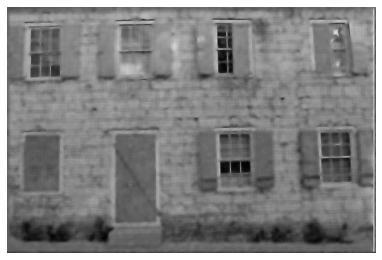

In [124]:
plt.imshow( output.squeeze().data.numpy(), cmap="gray")
plt.tight_layout()
plt.axis('off')

In [ ]:

cv2.rectangle(image, start_point, end_point, color, thickness)